In [1]:
# State of the Union use of we/America/etc over time

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [3]:
import glob
filenames = glob.glob("SOTU/*.txt")
contents = [open(filename).read() for filename in filenames]
sotu_df = pd.DataFrame({
    'content': contents,
    'filename': filenames
})
sotu_df.head(3)

,content,filename
0,Gentlemen of the Congress:\n\nIn pursuance of ...,SOTU/1913.txt
1,GENTLEMEN OF THE CONGRESS:\n\nThe session upon...,SOTU/1914.txt
2,GENTLEMEN OF THE CONGRESS:\n\nSince I last had...,SOTU/1915.txt


In [4]:
sotu_df['name'] = sotu_df['filename']
sotu_df.head()

,content,filename,name
0,Gentlemen of the Congress:\n\nIn pursuance of ...,SOTU/1913.txt,SOTU/1913.txt
1,GENTLEMEN OF THE CONGRESS:\n\nThe session upon...,SOTU/1914.txt,SOTU/1914.txt
2,GENTLEMEN OF THE CONGRESS:\n\nSince I last had...,SOTU/1915.txt,SOTU/1915.txt
3,GENTLEMEN OF THE CONGRESS:\n\nIn fulfilling at...,SOTU/1916.txt,SOTU/1916.txt
4,Gentlemen of the Congress:\n\nEight months hav...,SOTU/1917.txt,SOTU/1917.txt


In [5]:
sotu_df['year'] = sotu_df.filename.str.extract('SOTU/(\d*).', expand=False)
sotu_df.head(2)

,content,filename,name,year
0,Gentlemen of the Congress:\n\nIn pursuance of ...,SOTU/1913.txt,SOTU/1913.txt,1913
1,GENTLEMEN OF THE CONGRESS:\n\nThe session upon...,SOTU/1914.txt,SOTU/1914.txt,1914


In [6]:
sotu_df['datetime'] = pd.to_datetime(sotu_df['year'], format="%Y")
sotu_df.head(2)

,content,filename,name,year,datetime
0,Gentlemen of the Congress:\n\nIn pursuance of ...,SOTU/1913.txt,SOTU/1913.txt,1913,1913-01-01
1,GENTLEMEN OF THE CONGRESS:\n\nThe session upon...,SOTU/1914.txt,SOTU/1914.txt,1914,1914-01-01


In [7]:
sotu_df.loc[0]['content'][:50]

'Gentlemen of the Congress:\n\nIn pursuance of my con'

In [8]:
sotu_df['speech'] = sotu_df['content'].apply(lambda value: value.split("\n\n")[1])
del sotu_df['content']
sotu_df.head(2)

,filename,name,year,datetime,speech
0,SOTU/1913.txt,SOTU/1913.txt,1913,1913-01-01,"In pursuance of my constitutional duty to ""giv..."
1,SOTU/1914.txt,SOTU/1914.txt,1914,1914-01-01,The session upon which you are now entering wi...


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(vocabulary=['we', 'america'])
matrix = vec.fit_transform(sotu_df['speech'])
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
results

,we,america
0,0,0
1,1,0
2,0,0
3,0,0
4,2,0
5,2,0
6,1,0
7,0,0
8,0,0
9,0,0


In [18]:
sotu_df['we'] = results['we']
sotu_df['america'] = results['america']
sotu_df.head()

,filename,name,year,datetime,speech,we,America,america
0,SOTU/1913.txt,SOTU/1913.txt,1913,1913-01-01,"In pursuance of my constitutional duty to ""giv...",0,0,0
1,SOTU/1914.txt,SOTU/1914.txt,1914,1914-01-01,The session upon which you are now entering wi...,1,0,0
2,SOTU/1915.txt,SOTU/1915.txt,1915,1915-01-01,Since I last had the privilege of addressing y...,0,0,0
3,SOTU/1916.txt,SOTU/1916.txt,1916,1916-01-01,In fulfilling at this time the duty laid upon ...,0,0,0
4,SOTU/1917.txt,SOTU/1917.txt,1917,1917-01-01,Eight months have elapsed since I last had the...,2,0,0


In [13]:
sotu_df.groupby('year')['we'].sum()

year
1913    0
1914    1
1915    0
1916    0
1917    2
1918    2
1921    1
1922    0
1923    0
1934    0
1935    0
1936    3
1937    0
1938    0
1939    0
1940    0
1941    0
1942    0
1943    0
1944    0
1945    2
1947    0
1948    1
1949    0
1950    0
1951    0
1952    0
1953    0
1954    0
1955    3
       ..
1988    0
1989    1
1990    0
1991    7
1992    0
1993    0
1994    1
1995    2
1996    0
1997    5
1998    2
1999    0
2000    2
2001    1
2002    1
2003    4
2004    1
2005    3
2006    3
2007    0
2008    0
2009    0
2010    3
2011    1
2012    1
2013    3
2014    0
2015    3
2016    3
2017    4
Name: we, Length: 91, dtype: int64

In [14]:
%matplotlib inline

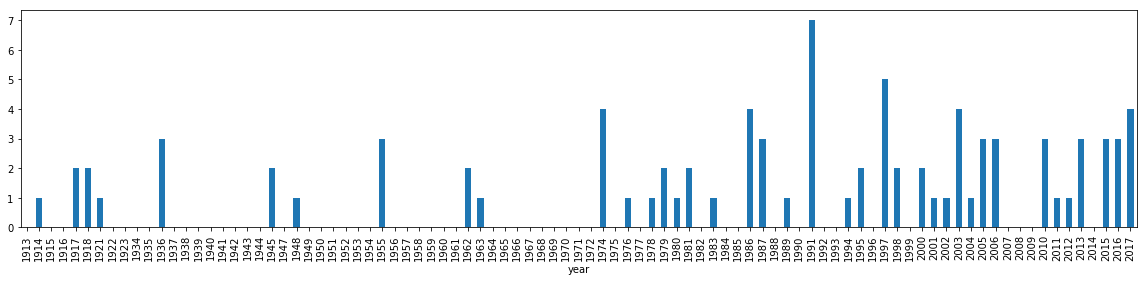

In [15]:
sotu_df.groupby('year')['we'].sum().plot(kind='bar', figsize=(20,4))

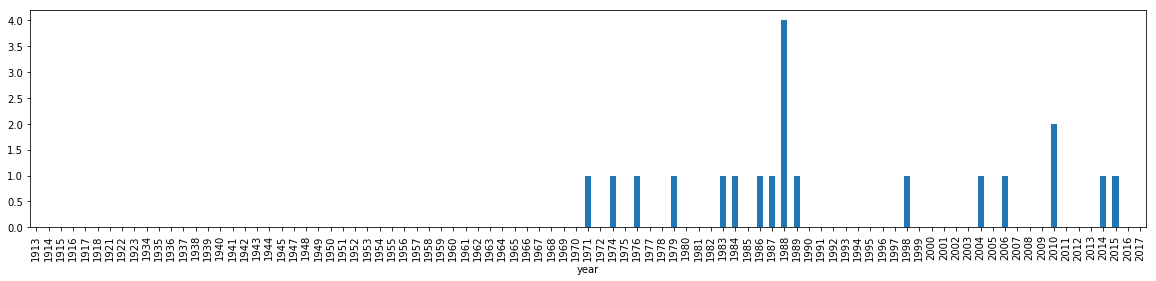

In [19]:
sotu_df.groupby('year')['america'].sum().plot(kind='bar', figsize=(20,4))